In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
advt = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
advt = advt.drop('Unnamed: 0',axis=1)
advt

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
advt.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No null values in the data set.

<function matplotlib.pyplot.show(*args, **kw)>

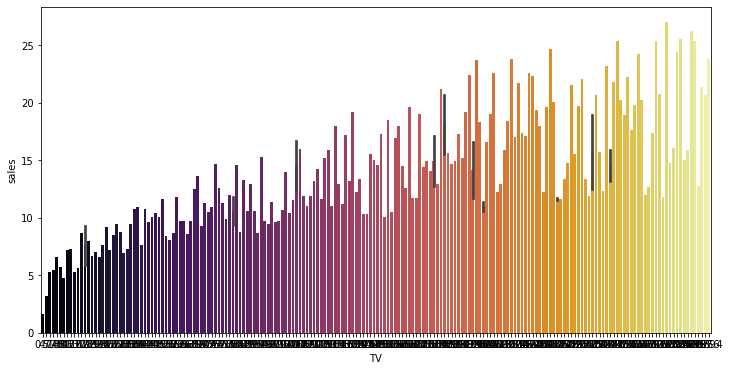

In [4]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'TV' , y= 'sales' , data = advt , palette='inferno')
plt.show

From the above graph we can check that the more advertisement on TV gives more results.

<function matplotlib.pyplot.show(*args, **kw)>

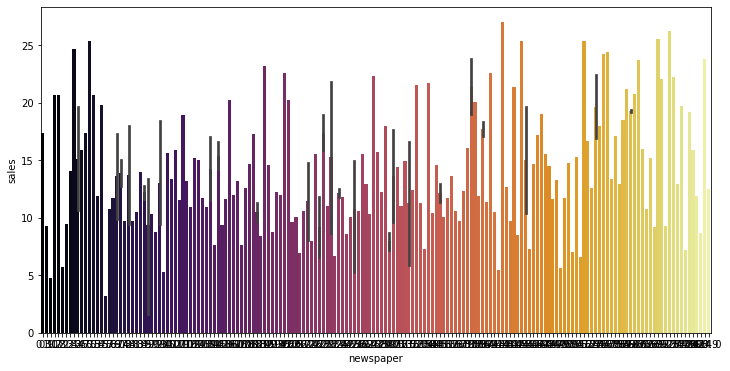

In [5]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'newspaper' , y= 'sales' , data = advt , palette='inferno')
plt.show

The graph reprsesents the relation between the ads in newspaper and sales. we can say that newspaper incresing the sales in an in order manner

<function matplotlib.pyplot.show(*args, **kw)>

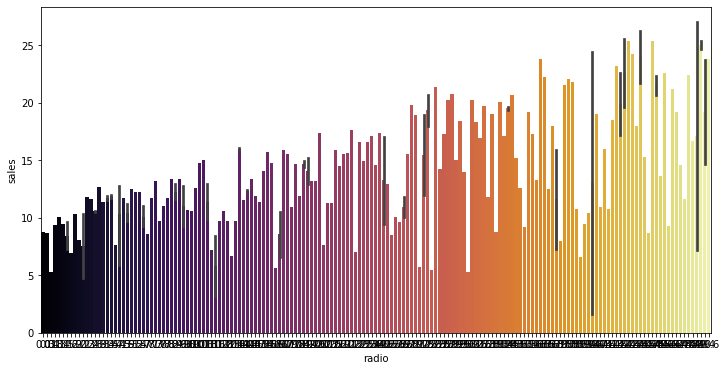

In [6]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'radio' , y= 'sales' , data = advt , palette='inferno')
plt.show

From the above graph we can say that more ads on radio gives higher sales.

TV              AxesSubplot(0.125,0.71587;0.0945122x0.16413)
radio        AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
newspaper    AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
sales        AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
dtype: object

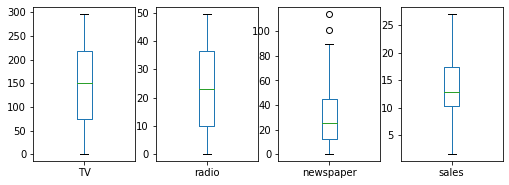

In [7]:
advt.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

From the above graph we can see that we have outliers in our data in newspaper columns.

In [8]:
from scipy.stats import zscore
z = np.abs(zscore(advt))
z.shape

(200, 4)

In [9]:
advt_new = advt[(z<3).all(axis=1)]
print(advt.shape)
print(advt_new.shape)

(200, 4)
(198, 4)


From the above 2 - steps we have identified the outliers and removed them. We can see that 2 rows have been removed from the dataset.

In [10]:
prcnt=(200-198)/200*100
prcnt

1.0

We can check there is 1% loss of data, which is good to go.

<function matplotlib.pyplot.show(*args, **kw)>

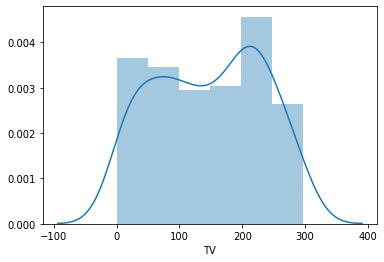

In [11]:
plt.figure()
sns.distplot(advt['TV'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

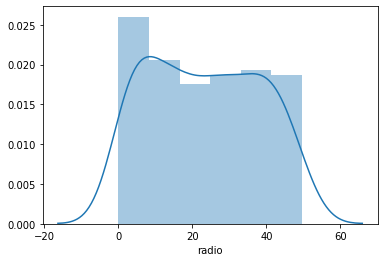

In [12]:
plt.figure()
sns.distplot(advt['radio'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

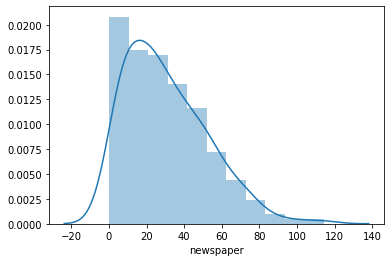

In [13]:
plt.figure()
sns.distplot(advt['newspaper'])
plt.show

From the above 3 graphs we can see that all the input variables have skewness in the data as the graph is slightly skewed and we aren't getting normalized curve for the same.

In [14]:
print(advt_new.skew())

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64


From the above details we can see that:

Newspaper is having skewness of 0.650112

In [15]:
from scipy import stats
from scipy.stats import boxcox
advt_new['newspaper'] = stats.boxcox(advt_new['newspaper'])[0]

In [16]:
advt_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.117312
sales        0.407130
dtype: float64

From the above steps we have successfully removed the skewness from the column, which we can check numerically.

In [17]:
advt_new.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.037738,0.779121
radio,0.051978,1.000000,0.296175,0.576748
newspaper,0.037738,0.296175,1.000000,0.190624
sales,0.779121,0.576748,0.190624,1.000000


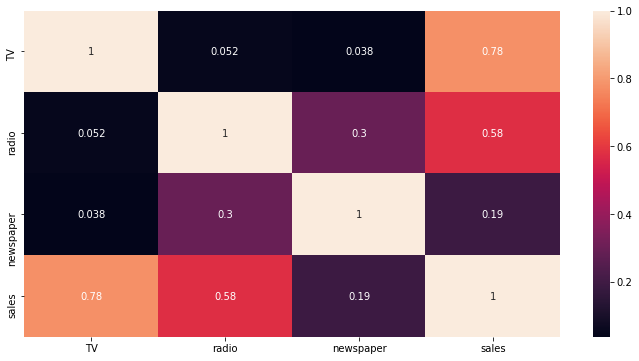

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(advt_new.corr(), annot = True)
plt.show()

From the above graph we can check that:-

        1.TV is not very corelated with radio and newspaper but highly corelated with sales.
        2.Radio is not highly corelated wth TV but having a good corelation with newspaper and sales
        3.Newspaper is not highly corelated wth TV but having a good corelation with radio and sales

We will proceed in building the model by splitting the dataset for training and testing purpose:-

In [19]:
x = advt_new.iloc[:,0:3]

In [20]:
y = advt_new['sales']

In [21]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

Scaling the data to remove imbalancing from the dataset as it effects our output

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Importing the regression algorithms required for the model and in below columns we have given assigned them to a varialbe wjhich can be used further.



In [23]:
dtc = DecisionTreeRegressor()
lr = LinearRegression()
svc = SVR()
rnd = RandomForestRegressor()

Finding best random state for our model in the below columns.

In [24]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("AT random state",i,"the model performing good")

AT random state 214 the model performing good
AT random state 737 the model performing good
AT random state 835 the model performing good
AT random state 860 the model performing good


We have found the random state where our model is performing good

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 214)
print(dtc.fit(x_train,y_train))
print(lr.fit(x_train,y_train))
print(svc.fit(x_train,y_train))
print(rnd.fit(x_train,y_train))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
             

We have fitted the train data to our model.

In [26]:
pred_dtc = dtc.predict(x_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_dtc))
print('Means Squared Error',mean_squared_error(y_test,pred_dtc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_dtc)))
print('Model Score',r2_score(y_test,pred_dtc))

Error Calculations: -
Means absolute error 0.735
Means Squared Error 0.9334999999999999
Root mean square 0.9661780374237452
Model Score 0.9634630814693047


In [27]:
pred_lr = lr.predict(x_test)
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_lr))
print('Means Squared Error',mean_squared_error(y_test,pred_lr))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Model Score',r2_score(y_test,pred_lr))

Error Calculations: -
Means absolute error 1.3272909397975607
Means Squared Error 2.6857491913277847
Root mean square 1.6388255524392414
Model Score 0.8948805576888869


In [28]:
pred_svc = svc.predict(x_test)
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_svc))
print('Means Squared Error',mean_squared_error(y_test,pred_svc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_svc)))
print('Model Score',r2_score(y_test,pred_svc))

Error Calculations: -
Means absolute error 1.476392386787556
Means Squared Error 3.8903541756185476
Root mean square 1.9723980773714387
Model Score 0.84773266891256


In [29]:
pred_rnd = rnd.predict(x_test)
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_rnd))
print('Means Squared Error',mean_squared_error(y_test,pred_rnd))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_rnd)))
print('Model Score',r2_score(y_test,pred_rnd))

Error Calculations: -
Means absolute error 0.553000000000001
Means Squared Error 0.44367570000000056
Root mean square 0.66608985880285
Model Score 0.9826346621264603


Above we calculated the mean absolute error, mean squarred error and squre root of the error, they represents the difference between the actual value and predicted value

In [30]:
rnd.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Performing hyper parameter tuning in order to find the best parameters for the machine learning model.

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' :[100,200,300,400,500,600,700,800],
               'criterion'  :['squared_error','mse','absolute_error','poisson'],
               'max_depth' :[300,400,500,600,700,800],
               'min_samples_split' :[100,200,300,400,500]   
             }

grid_cv = GridSearchCV(estimator=rnd, param_grid = parameters)
grid_cv.fit(x_test, y_test)
best_para = grid_cv.best_params_
print(best_para)
best_result = grid_cv.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'mse', 'max_depth': 500, 'min_samples_split': 300, 'n_estimators': 100}
-1.1824006001391028
-1.18


Calculating the CV score for the algorithms.

In [32]:
from sklearn.model_selection import cross_val_score
score_dtc=cross_val_score(dtc,x,y,cv=5)
print(score_dtc)
print(score_dtc.mean())
print(score_dtc.std())

[0.95606871 0.94964801 0.94400538 0.91305131 0.96535108]
0.9456248986271888
0.017765371376441793


In [33]:
score_lr=cross_val_score(lr,x,y,cv=5)
print(score_lr)
print(score_lr.mean())
print(score_lr.std())

[0.87926295 0.91751032 0.92571827 0.81091003 0.89557154]
0.8857946247264327
0.04085519832538999


In [34]:
score_svc=cross_val_score(svc,x,y,cv=5)
print(score_svc)
print(score_svc.mean())
print(score_svc.std())


[0.85022282 0.87041722 0.83979407 0.8443175  0.78117476]
0.8371852733481528
0.029897131216764357


In [35]:
score_rnd=cross_val_score(rnd,x,y,cv=5)
print(score_rnd)
print(score_rnd.mean())
print(score_rnd.std())


[0.98007319 0.9824289  0.97185206 0.96080591 0.97964656]
0.974961323863992
0.00792326202047105


In [36]:
print('Model Score',r2_score(y_test,pred_dtc))
print('Mean Score After CV',score_dtc.mean())
print("Model Score is", r2_score(y_test,pred_dtc)-score_dtc.mean())

Model Score 0.9634630814693047
Mean Score After CV 0.9456248986271888
Model Score is 0.017838182842115913


In [37]:
print('Model Score',r2_score(y_test,pred_lr))
print('Mean Score After CV',score_lr.mean())
print("Model Score is", r2_score(y_test,pred_lr)-score_lr.mean())

Model Score 0.8948805576888869
Mean Score After CV 0.8857946247264327
Model Score is 0.00908593296245419


In [38]:
print('Model Score',r2_score(y_test,pred_svc))
print('Mean Score After CV',score_svc.mean())
print("Model Score is", r2_score(y_test,pred_svc)-score_svc.mean())
print('\n')      

Model Score 0.84773266891256
Mean Score After CV 0.8371852733481528
Model Score is 0.010547395564407203




In [39]:
print('Model Score',r2_score(y_test,pred_rnd))
print('Mean Score After CV',score_rnd.mean())
print("Model Score is", r2_score(y_test,pred_rnd)-score_rnd.mean())

Model Score 0.9826346621264603
Mean Score After CV 0.974961323863992
Model Score is 0.007673338262468299


We have calculated the difference between the CV mean score and algorithm score, we can see that Random forest has the least difference hence we can say that Random forest is the best algorith for our model.

In [40]:
import pickle
filename = 'advertising_final_model.pkl'
pickle.dump(rnd, open(filename, 'wb'))